# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries**

In [1]:
# Let's import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction - Samara Reddy/SeoulBikeData.csv', encoding = 'latin')

In [4]:
# Printing the first 5 rows of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Printing last five rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Creating a copy of the dataset
bike_df = df.copy()

In [7]:
# Checking the names of the features in the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# The features after renaming them
print('The features in the dataset:')
bike_df.columns

The features in the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Checking the shape of the dataset
bike_df.shape

(8760, 14)

There are 8760 records and 14 features in the dataset.

rented_bike_count is the dependent variable

In [10]:
# Checking the basic information of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are total 8760 rows in the dataset. All of them are non null. The hour feature is of int64 datatype. It should be converted to category as it is a categorical feature.

In [11]:
# Checking the descriptive statistics of the dataset
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [12]:
# Glance through the unique values
print(bike_df['Seasons'].unique())
print(bike_df['Holiday'].unique())
print(bike_df['Functioning Day'].unique())
print(bike_df['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


We have the records of bike sharing from 01/12/2017 to 30/11/2018 which
corresponds to 1 year.

There are total 4 seasons in the dataset: Spring, Winter, Summer, Autumn

The holiday has 2 values: Holdiay, No holiday

The functioning day has 2 values: Yes, No

**Feature Description**
### Date : The date of the day, type:str
### Rented Bike Count - Number of rented bikes per hour and it is also a dependent variable, type:int
### Hour - Hour of the day ranging from 0-23, type: int
### Temperature (°C)-Temperature in Celsius, type:float
### Humidity(%) - Humidity in the air in %, type: int
### Wind speed (m/s) - Speed of the wind in m/s, type: float
### Visibility (10m) - Visibility in m, type: int
### Dew point temperature(°C) - The temperature at which the water starts to condense out of the air, type: float
### Solar Radiation (MJ/m2) - Electromagnetic radiation emitted by the Sun, type: float
### Rainfall(mm) - Amount of rainfall in mm, type: float italicized text
### Snowfall(cm) - Amount of snowfall in cm, type: float
### Seasons - Season of the year, type: str
### Holiday - If the day is holiday or not, type: str
### Functioning Day - Whether the day is functional or not, type:str

Cleaning the Dataset

In [13]:
# Checking Missing Values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

As we can see from above result that there are no missing values in the dataset.

In [14]:
# Checking whether there are duplicate records in the dataset.
dup_no = len(bike_df[bike_df.duplicated()])
print('The number of duplicated rows in the dataset are: ', dup_no)

The number of duplicated rows in the dataset are:  0


There are not any duplicate rows and missing values in the dataset

Some feature names are quite lengthy, lets rename the features

**Renaming the features**

In [15]:
# Renaming the feature names

bike_df = bike_df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [16]:
#Converting the 'date' feature from string to datetime 
bike_df['date'] = bike_df['date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))


In [17]:
# extracting the year and month from the date feature
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['weekday'] = bike_df['date'].dt.weekday

In [18]:
# creating a new column of'weekdays_weekend' 
bike_df = bike_df.drop(columns = ['date'], axis = 1)

In [19]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


In [20]:
print(bike_df['weekday'].unique())

[4 5 6 0 1 2 3]


In [21]:
# since the weekdays are in range 0-6 lets convert it to 1-7
bike_df['weekday'] = np.array(bike_df['weekday']) + 1
bike_df['weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [22]:
# Changing te data type of hour feature to categorical
feat = ['hour']
for ele in feat:
  bike_df[ele] = bike_df[ele].astype('category')

In [23]:
# Assigning month names to month numbers as well as day name to day numbers.
bike_df['months_string'] = bike_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike_df['days'] = bike_df['weekday'].map({1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}) 


In [24]:
# Updated dataset
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday


In [25]:
# dropping 'month' and 'weekday' columns as we have created the months_string and days features from this column
bike_df.drop(['month', 'weekday', 'year'], axis = 1, inplace = True)

**Exploratory Data Analysis**

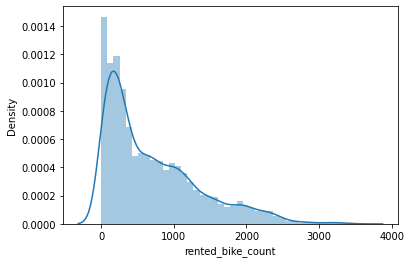

In [26]:
# Checking the distribution of the dependent variable
sns.distplot(bike_df['rented_bike_count'])
sns.set(rc = {'figure.figsize': (10,5)})

From the above distribution plot the dependent variable looks skewed.

The rented bike count data is positively skewed

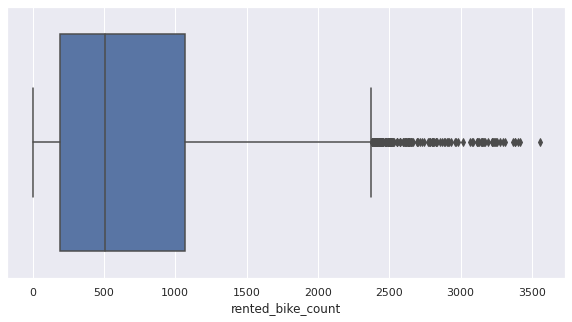

In [27]:
sns.boxplot(bike_df['rented_bike_count'])

The above boxplot shows that there are outliers in the rented bike count data

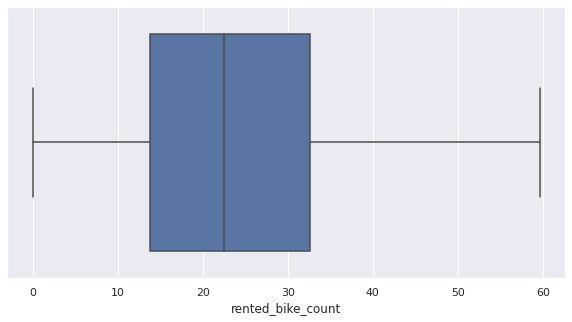

In [28]:
# Applying square root transformation as it normalize the skewed data
sns.boxplot(x = np.sqrt(bike_df['rented_bike_count']))

After square root transformation outliers have been removed.

Our model works best when the data is normally distributed.

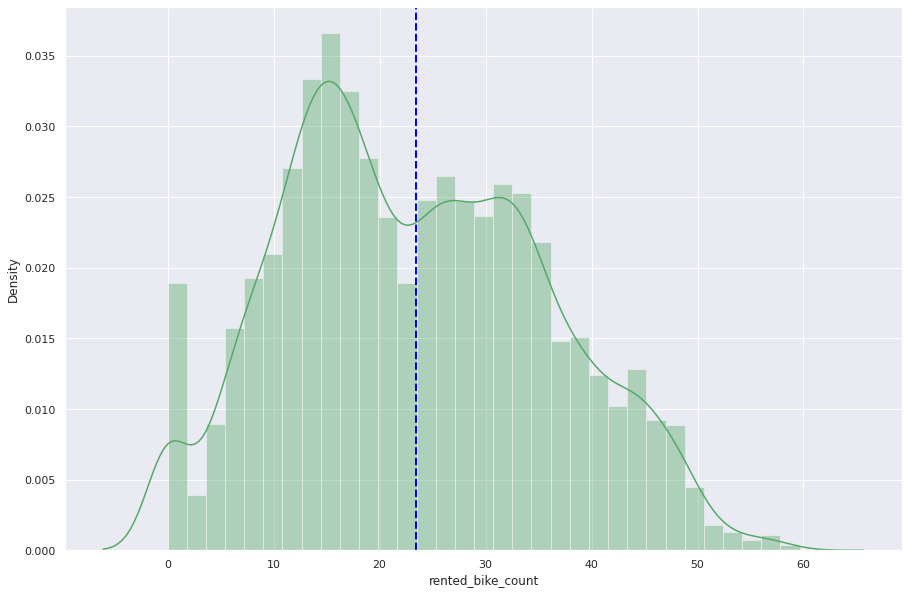

In [29]:
#Applying square root transformation to the dependent variable to remove the skewness
plt.figure(figsize=(15,10))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['rented_bike_count']), color="g")
ax.axvline(np.sqrt(bike_df['rented_bike_count']).mean(), color='blue', linestyle='dashed', linewidth=2)


Exploring Categorical Features

In [30]:
categorical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes == 'O']
print('The categorical features in the dataset are:',categorical_feat)

The categorical features in the dataset are: ['seasons', 'holiday', 'func_day', 'months_string', 'days']


Finding relation between various features and dependent variable using Bar plot

Text(0.5, 1.0, 'Rented bike count on different seasons')

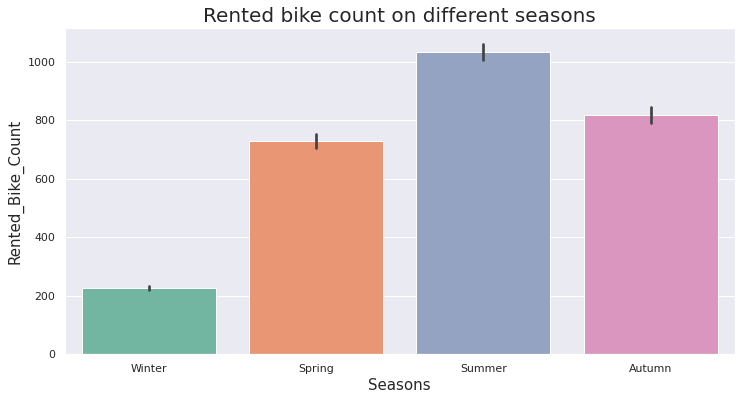

In [31]:
# Finding relation between seasons and rented bike count
plt.figure(figsize = (12,6))
x0 = sns.barplot(x = 'seasons', y = 'rented_bike_count', data = bike_df, palette = 'Set2')
x0.set_xlabel('Seasons', fontsize = 15)
x0.set_ylabel('Rented_Bike_Count', fontsize = 15)
x0.set_title('Rented bike count on different seasons', fontsize = 20)

Rented bike count is significantly less in Winter whereas high on summer

Text(0.5, 1.0, 'Rented Bike Count on each day')

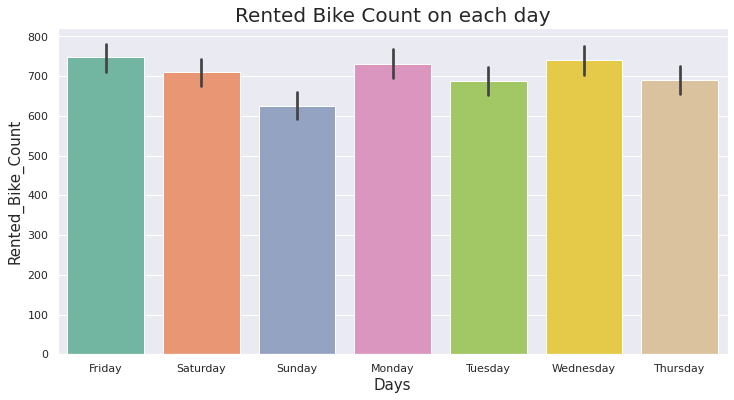

In [32]:
# plot for the rented bike count against weekday
plt.figure(figsize = (12,6))
x0 = sns.barplot( x= 'days', y = 'rented_bike_count', data = bike_df, palette = 'Set2')
x0.set_xlabel('Days', fontsize = 15)
x0.set_ylabel('Rented_Bike_Count', fontsize = 15)
x0.set_title('Rented Bike Count on each day', fontsize = 20)

In all days, the bike count is more or less the same

Text(0.5, 1.0, 'Rented Bike Count vs Holdiay')

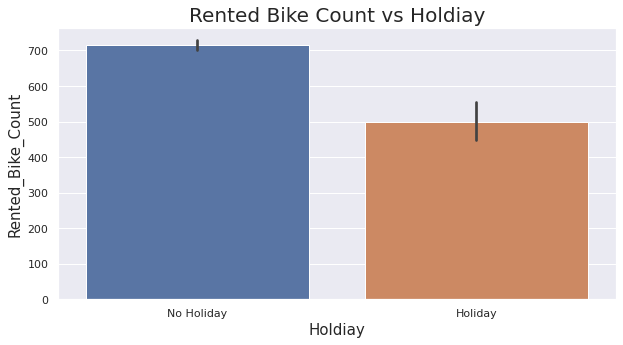

In [33]:
# Understanding the rented bike count on holiday vs non holiday
plt.figure(figsize = (10,5))
x0 = sns.barplot(x = 'holiday',y='rented_bike_count', data = bike_df)
x0.set_xlabel('Holdiay', fontsize = 15)
x0.set_ylabel('Rented_Bike_Count', fontsize = 15)
x0.set_title('Rented Bike Count vs Holdiay', fontsize = 20)

We see that people are renting bike more on non holidays than holidays.

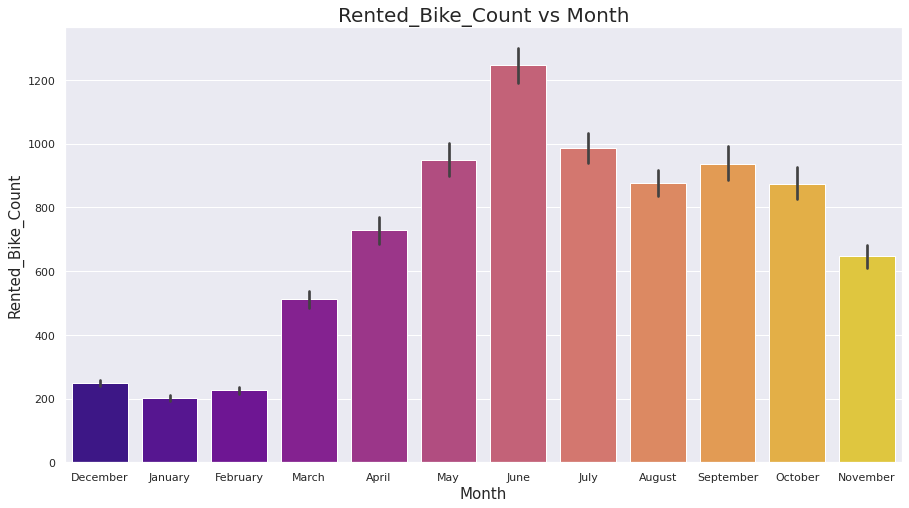

In [34]:
#Plotting bike count across months
plt.figure(figsize=(15,8))
x0= sns.barplot(x ='months_string', y ='rented_bike_count', data = bike_df, palette ='plasma')
x0.set_xlabel("Month",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Month",fontsize=20)
plt.show()

The demand for rental bikes is highest in the month of June and decreases gradually till December.

he demand for rental bikes is least in the month of January.

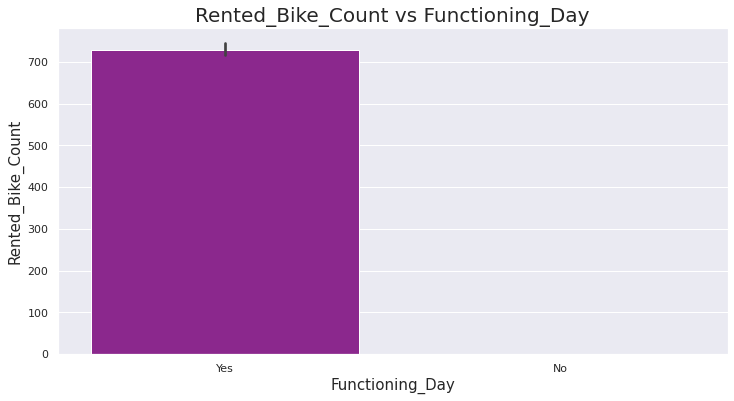

In [35]:
# Checking the bike count on a functioning day v/s a non functioning day
plt.figure(figsize=(12,6))
x0= sns.barplot(x ='func_day', y ='rented_bike_count', data = bike_df, palette ='plasma')
x0.set_xlabel("Functioning_Day",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Functioning_Day",fontsize=20)
plt.show()

The rented bike count is 0 on a non functioning day.

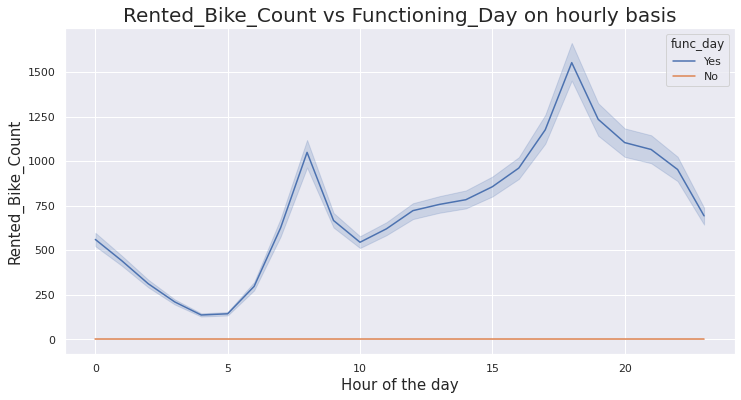

In [36]:
# Rented bike count on func vs non func day on an hourly basis.
plt.figure(figsize = (12,6))
x0 = sns.lineplot(data = bike_df, x='hour', y = 'rented_bike_count', hue = 'func_day')
x0.set_xlabel("Hour of the day",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Functioning_Day on hourly basis",fontsize=20)
plt.show()

The above plot suggests that the people use bikes only on functioning day.

Also it means from company's perspective, if anyone rents bike on a day then that is a funcitoning day.

**Exploring Numerical Features**

In [37]:
# Collecting numerical features present in the dataset
numerical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes != 'O' and feature not in ['weekday', 'month', 'date', 'year', 'rented_bike_count', 'hour'] ]
numerical_feat

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

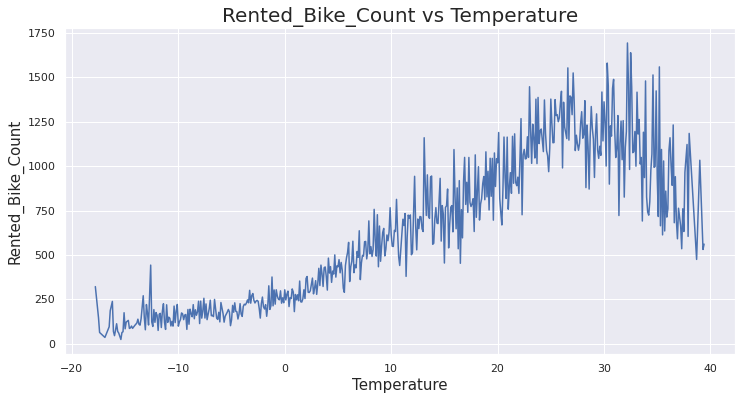

In [38]:
# Plotting number of bike rented vs temperature

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('temp').mean()['rented_bike_count']
x0 = sns.lineplot(data=temp_df)
x0.set_xlabel("Temperature",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Temperature",fontsize=20)
plt.show()


There is a increase in demand of rental bikes as the temperature increases.

The maximum demand is around 28-33 degree celsius.

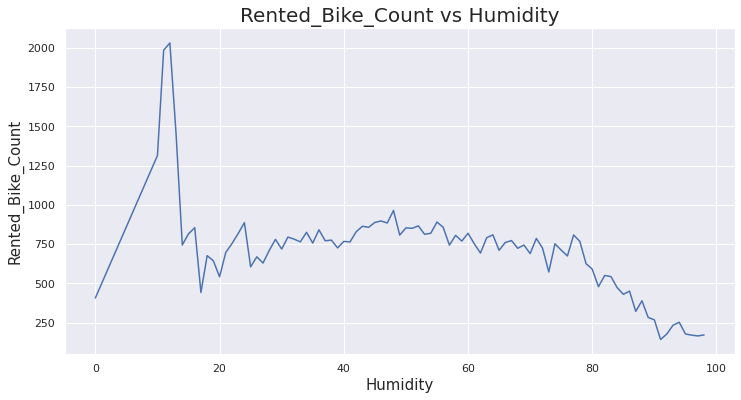

In [39]:
# Understanding the relation between rented bike count and humidity

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('humidity').mean()['rented_bike_count']
x1 = sns.lineplot(data=temp_df)
x1.set_xlabel("Humidity",fontsize=15)
x1.set_ylabel("Rented_Bike_Count",fontsize=15)
x1.set_title("Rented_Bike_Count vs Humidity",fontsize=20)
plt.show()

The demand for rented bikes drops as humidity increases.

The rented bike count is maximum when humidity is around 15%.

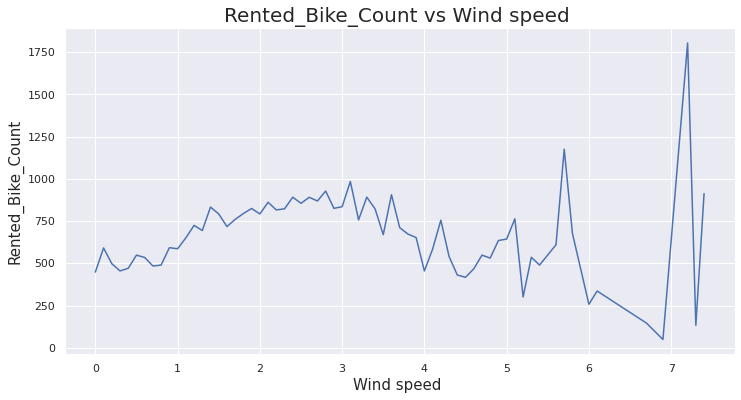

In [40]:
#Understanding how wind speed affects the bike count through lineplot

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('wind_speed').mean()['rented_bike_count']
x2 = sns.lineplot(data=temp_df)
x2.set_xlabel("Wind speed ",fontsize=15)
x2.set_ylabel("Rented_Bike_Count",fontsize=15)
x2.set_title("Rented_Bike_Count vs Wind speed ",fontsize=20)
plt.show()

The bike count gradually decreases as the wind speed increases but its maximum at around 7m/s.

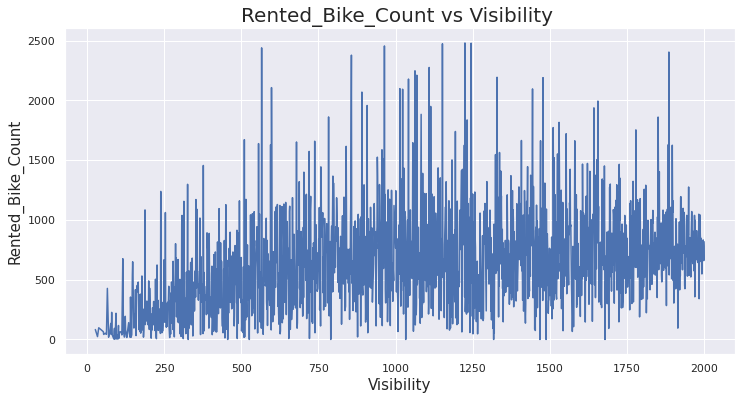

In [41]:
#Understanding how visibility effects the rented bike count

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('visibility').mean()['rented_bike_count']
x3 = sns.lineplot(data=temp_df)
x3.set_xlabel("Visibility",fontsize=15)
x3.set_ylabel("Rented_Bike_Count",fontsize=15)
x3.set_title("Rented_Bike_Count vs Visibility ",fontsize=20)
plt.show()

The visibility has no effect on the rented bike count.

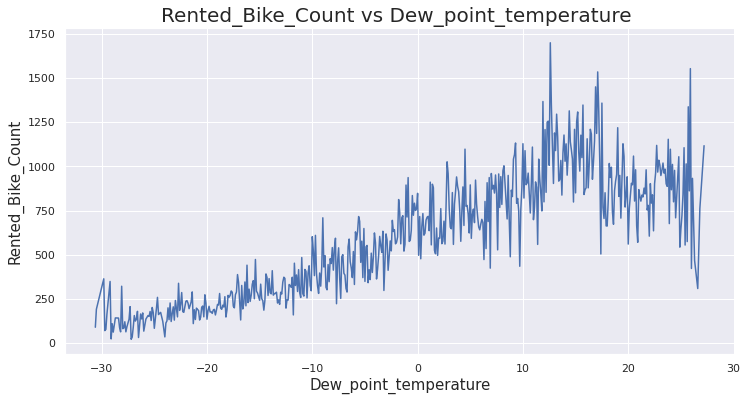

In [42]:
# Understanding relation between dew point temperature and rented bike count
plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('dew_point_temp').mean()['rented_bike_count']
x4 = sns.lineplot(data=temp_df)
x4.set_xlabel("Dew_point_temperature",fontsize=15)
x4.set_ylabel("Rented_Bike_Count",fontsize=15)
x4.set_title("Rented_Bike_Count vs Dew_point_temperature ",fontsize=20)
plt.show()

There is an increasing trend in rented_bike_count upto almost 18 degree celsius .

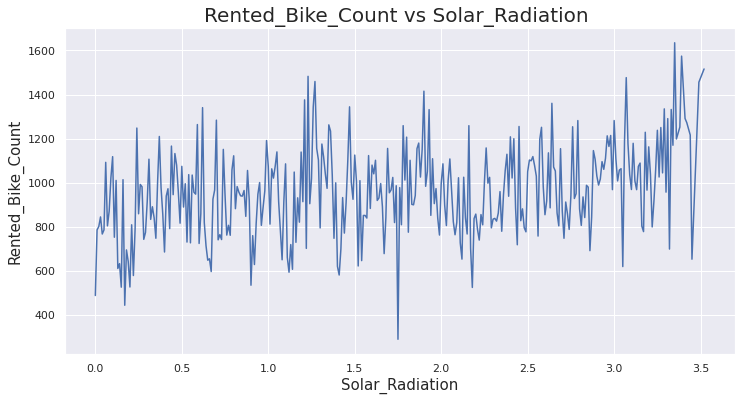

In [43]:
#Understanding how solar radiation effects the rented bike count through line plot

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('solar_radiation').mean()['rented_bike_count']
x5 = sns.lineplot(data=temp_df)
x5.set_xlabel("Solar_Radiation",fontsize=15)
x5.set_ylabel("Rented_Bike_Count",fontsize=15)
x5.set_title("Rented_Bike_Count vs Solar_Radiation ",fontsize=20)
plt.show()

The soalr radiation has no effect on the rented bike count.

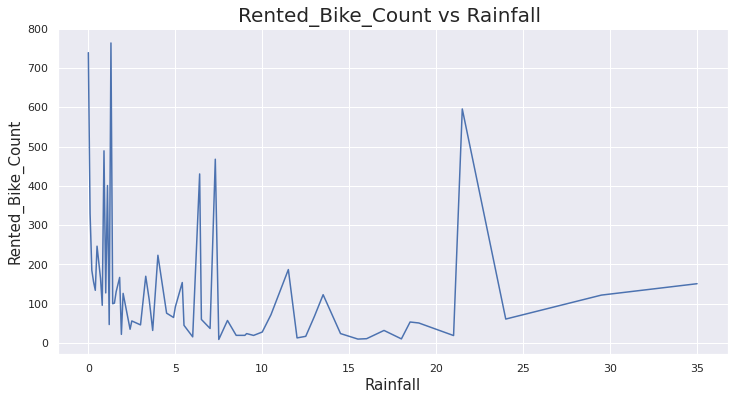

In [44]:
#Understanding how rainfall effects the bike count

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('rainfall').mean()['rented_bike_count']
x6 = sns.lineplot(data=temp_df)
x6.set_xlabel("Rainfall",fontsize=15)
x6.set_ylabel("Rented_Bike_Count",fontsize=15)
x6.set_title("Rented_Bike_Count vs Rainfall ",fontsize=20)
plt.show()

The demand decreases as the rainfall increases but there is a spike in bike count around 22mm of rainfall.
The bike count is highest when there is no rainfall.

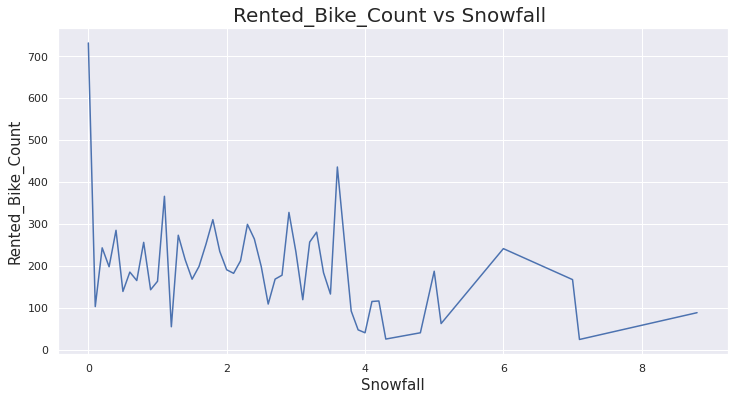

In [45]:
# Understanding impact of snowfall on rented bike count

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('snowfall').mean()['rented_bike_count']
x7 = sns.lineplot(data=temp_df)
x7.set_xlabel("Snowfall",fontsize=15)
x7.set_ylabel("Rented_Bike_Count",fontsize=15)
x7.set_title("Rented_Bike_Count vs Snowfall ",fontsize=20)
plt.show()


It seems that people generally prefer renting bike when there is no snowfall.

Understanding the relation between various numerical features and dependent variable through regression plots.

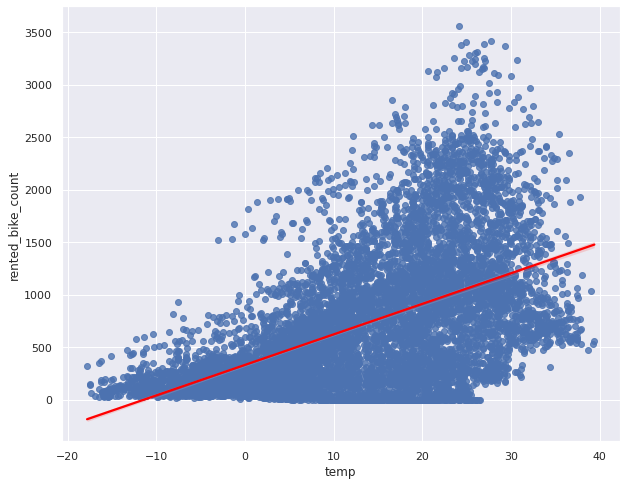

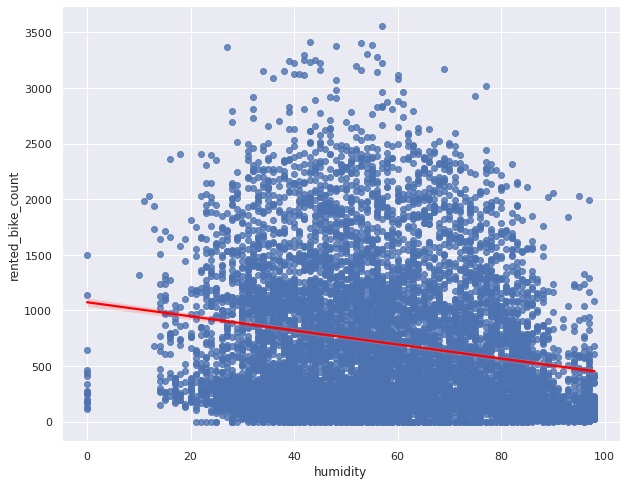

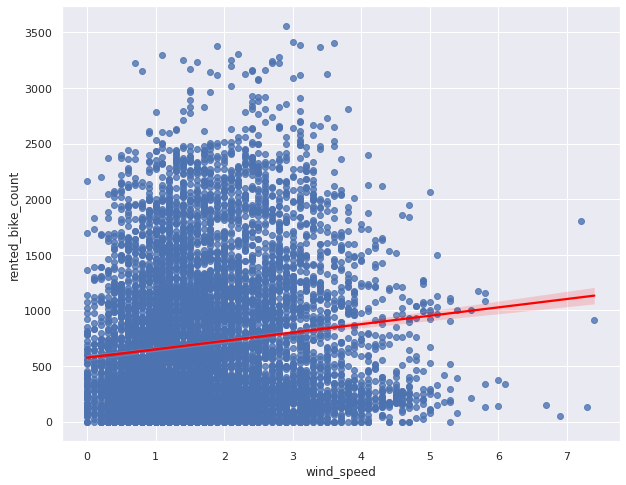

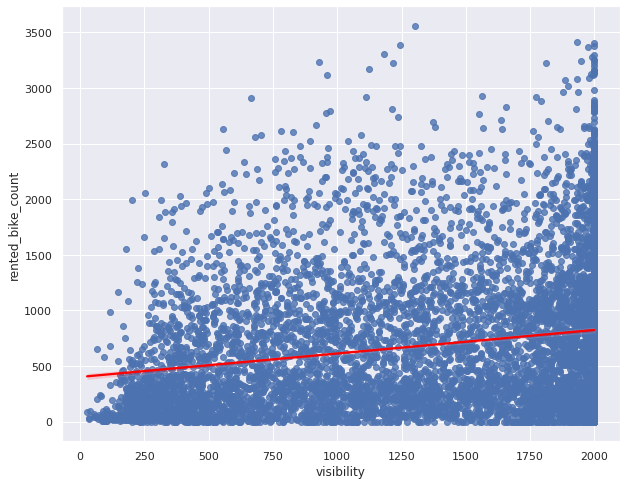

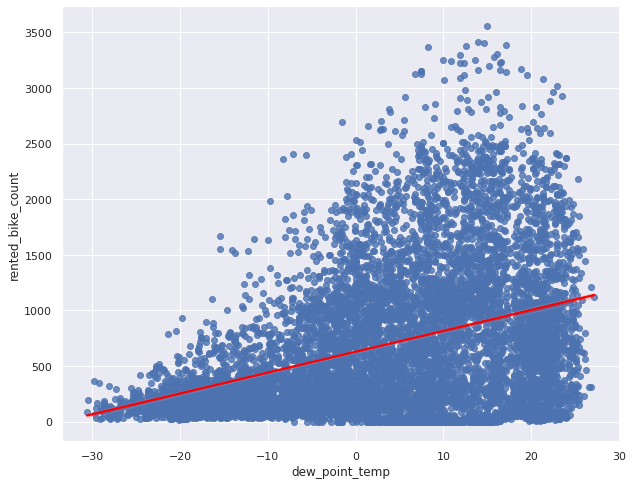

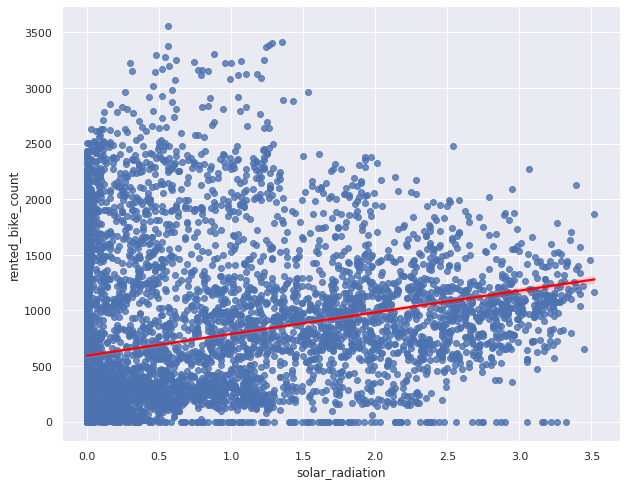

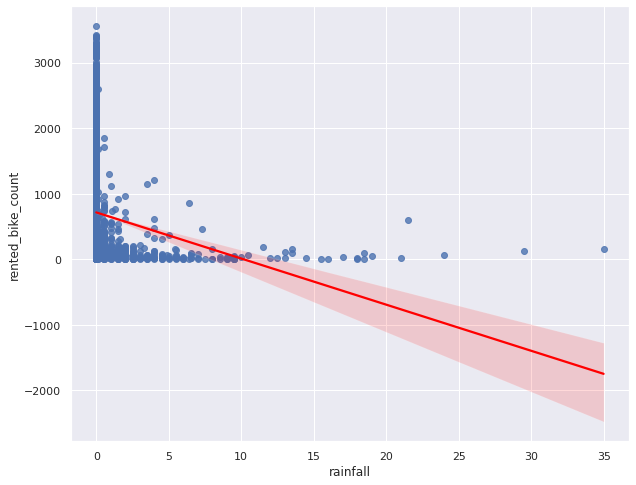

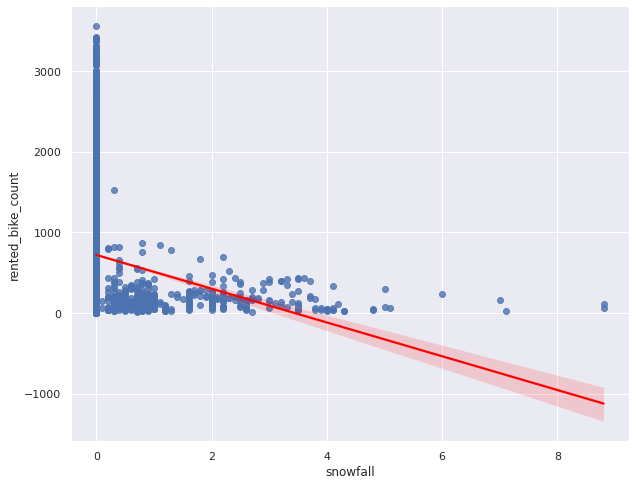

In [46]:
# Plotting regression plot for each numerical feature 
plt.rcParams['figure.figsize'] = (10,8)
for feat in numerical_feat:
  plt.figure()
  sns.regplot( x =bike_df[feat], y = bike_df['rented_bike_count'], line_kws={"color": "Red"})


**Observation on relation between numerical fatures and dependent variable**
**hour** - The demand for bike increases throughout the day, maximum at around 6 pm.

**temp** - Temperature is positively correlated with the people using bikes. The maximum is between 20 °C and 30 °C.

**humidity** - Humidity is the amount of water vapor in the air. Looking at the reg plot, people prefer using bikes when there is less humidity.

**visibility** - Visibility does not affect much still showing a slight positive correlation with people renting bike.

**snowfall and rainfall** - People don't prefer renting bike when there is ranifall or snowfall.

**dew_point_temp** - The dew point temperature is positively correlated to the dependent variable.

**wind_speed** - The wind speed don't affect much the dependent variable.

**Solar_radiation** - Solar radiation seems to slightly positive correlated with the dependent variable.

**Understanding relation between other features and dependent variable**

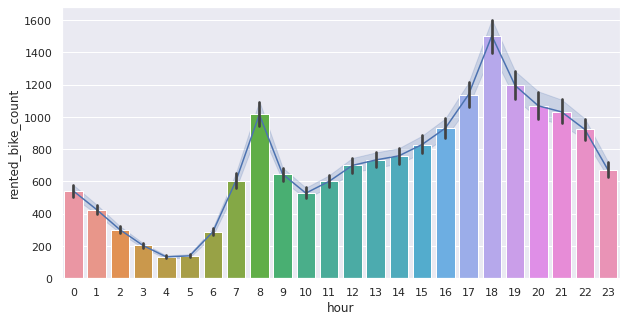

In [47]:
# bar plot between hour and rented bike count
plt.figure(figsize = (10,5))
sns.lineplot( x = bike_df['hour'], y = bike_df['rented_bike_count'])
sns.barplot(x = bike_df['hour'], y = bike_df['rented_bike_count'])

From the above plot it seems that demand is high around 6-9 am and 7-9 pm.

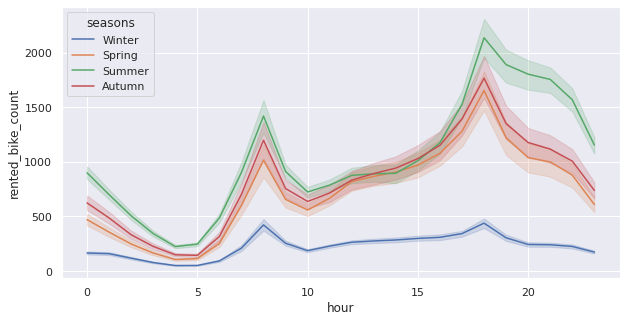

In [48]:
# line plot of hour vs rented bike count with respect to seasons
plt.figure(figsize = (10,5))
sns.lineplot(data = bike_df, x = 'hour', y = 'rented_bike_count', hue = 'seasons')


The above plot indicates that people prefer renting bike more in summer season and least in winter season.

The plot also indicates that people prefer renting bike in the evening at around 4pm to 8pm as well as in the morning 6-9am.

Looking at the time it is possible that people going to offices use bikes for commute.

**Lets understand the correlation between variables.**

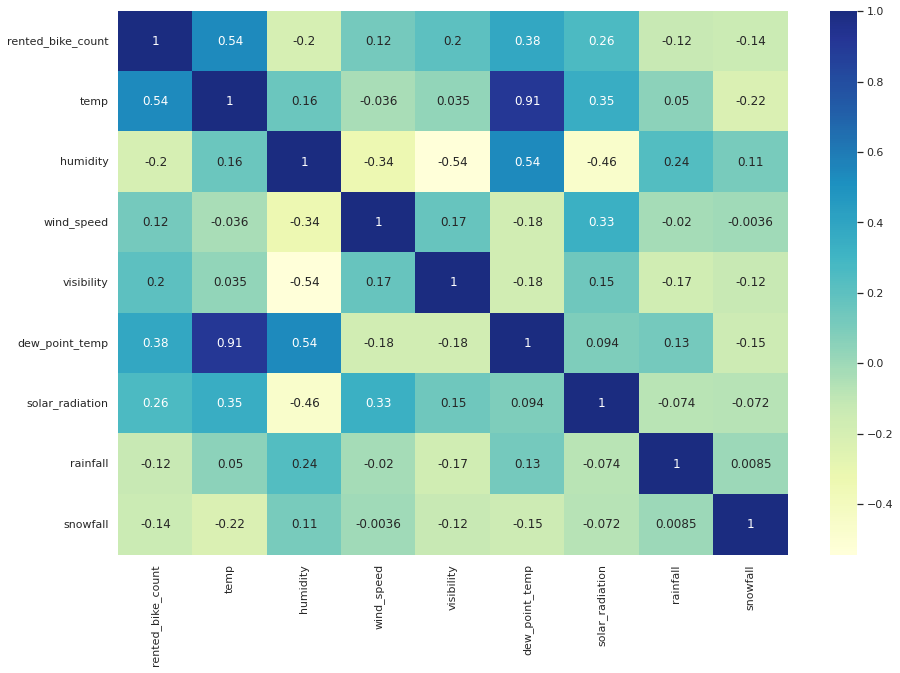

In [49]:
# Understanding correlation using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'YlGnBu', center = 0.3)

Hour and temperature are highly correlated with bike count as compared to other features.

Rainfall and snowfall are negatively correlated with rented bike count.

Dew point temp and temperature are highly correlated with each other, we can add them together.

In [50]:
# Lets drop the columns which are not important
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


In [51]:
# creating new feature from temperature and dew point temperature as they both are related to each other.
bike_df['Temperature_and_dew_temp'] = bike_df['temp'] + bike_df['dew_point_temp']
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days,Temperature_and_dew_temp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-22.8
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.7
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.8
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-24.6


In [52]:
# Dropping temperature and dew point temperature columns as we merged these 2 features to make a single feature to remove multicollinearity
bike_df.drop(['temp', 'dew_point_temp'], axis =1, inplace = True)

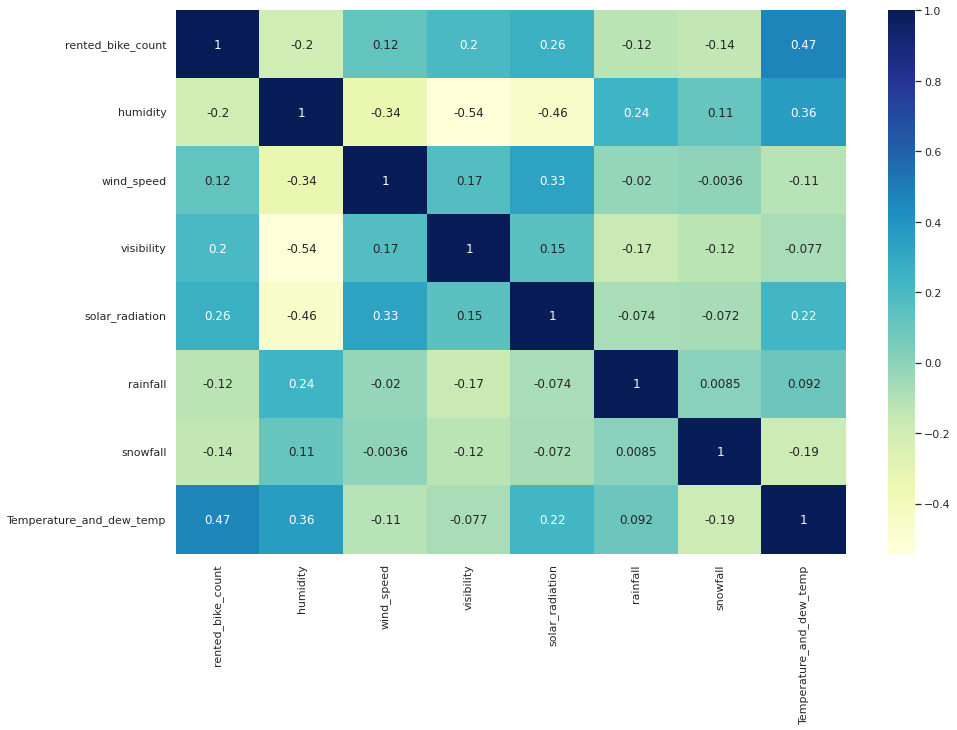

In [53]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'YlGnBu')

We can find that the following features are positively correlated with target variable:
  
###temperature and dew point temperature

###solar radiation

The following features are negatively correlated with target variable:

###rainfall
###snowfall

**Creating dummy variables of categorical features**

**One hot encoding**

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [54]:
# Encoding categorical variables
cat_feat = list(bike_df.select_dtypes(['object', 'category']).columns)
cat_feat = pd.Index(cat_feat)
cat_feat

Index(['hour', 'seasons', 'holiday', 'func_day', 'months_string', 'days'], dtype='object')

In [55]:
# # One hot encoding
# #creating a copy of the dataframe
bike_data = bike_df.copy()

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis =1)
  data = data.drop([column], axis = 1)
  return data

for col in cat_feat:
  bike_data = one_hot_encoding(bike_data, col)

In [56]:
bike_data.head()

,rented_bike_count,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,Temperature_and_dew_temp,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,func_day_Yes,months_string_August,months_string_December,months_string_February,months_string_January,months_string_July,months_string_June,months_string_March,months_string_May,months_string_November,months_string_October,months_string_September,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday
0,254,37,2.2,2000,0.0,0.0,0.0,-22.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,38,0.8,2000,0.0,0.0,0.0,-23.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,39,1.0,2000,0.0,0.0,0.0,-23.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,40,0.9,2000,0.0,0.0,0.0,-23.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,36,2.3,2000,0.0,0.0,0.0,-24.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Linear Regression Model**

Linear regression have some assumptions which are as follows:

**Linear relationship**: Relationship between the target variable and the features should be linear.

**Little or No multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are correlated with each other.

**Homoscedasticity**: Homoscedasticity describes a situation in which the error is the same across the data.

**Normality**: For any fixed value of X, Y is normally distributed.


In [57]:
# Separating the dependent and independent features.
X = bike_data.drop(columns= ['rented_bike_count'], axis =1)
y = np.sqrt(bike_data['rented_bike_count'])

In [58]:
#Checking the variance inflation factor for features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [59]:
calc_vif(bike_data[[i for i in bike_df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,humidity,4.948927
1,wind_speed,4.172802
2,visibility,4.390699
3,solar_radiation,2.056034
4,rainfall,1.078836
5,snowfall,1.116727
6,Temperature_and_dew_temp,2.166404


The VIF factor is less than 10 for all features which indicates no multicolinearity.

In [60]:
# Split the data for train and test. Splitting the dataset as training and test data in 80/20 ratio. 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)

(7008, 52)


In [61]:
# create an instance of linear regression
lin_reg = LinearRegression()

# fitting Linear Regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
# model score
lin_reg.score(X_train, y_train)

0.7780822840147327

In [63]:
# Checking the coefficient
lin_reg.coef_

array([-1.89420986e-01, -6.20493687e-02,  1.15220781e-03,  9.73769591e-01,
       -1.49176629e+00, -2.35928703e-02,  2.75604205e-01, -1.96496866e+00,
       -4.87380467e+00, -7.20790865e+00, -9.43129107e+00, -9.08037787e+00,
       -4.02811441e+00,  2.18280324e+00,  7.56808925e+00,  1.26919884e+00,
       -3.23168268e+00, -3.45697279e+00, -2.72169688e+00, -2.84517583e+00,
       -2.81215060e+00, -1.65994756e+00,  2.48248599e-01,  3.91114018e+00,
        1.04495601e+01,  6.81993253e+00,  6.01831914e+00,  6.32778470e+00,
        5.05285500e+00,  1.53055615e+00, -1.08520833e+00, -1.68227492e+00,
       -3.15529554e+00,  3.29740854e+00,  2.85948391e+01, -4.16573081e+00,
        5.63430165e-01, -2.26015509e+00, -1.45857061e+00, -1.89003170e+00,
        4.37348759e+00, -9.52233314e-01,  1.92200385e+00,  2.67654401e+00,
        3.17477103e+00,  7.14637545e-02, -1.31874729e+00, -1.15399825e+00,
       -2.75636524e+00, -5.64729455e-01, -4.55895116e-01, -4.16426755e-01])

In [64]:
# predictions on train and test data
train_pred_lr= lin_reg.predict(X_train)
test_pred_lr= lin_reg.predict(X_test)

**Evaluation Metrics**

Creating funtion to calculate evaluation metrics

In [65]:
# create train and test result dictionaries
train_result={}
test_result= {}

def evaluation_metrics(y_true, y_pred, model=None, train=True):

  ''' takes actual target values and estimated target values as input
      and returns evaluation metrics as output '''

  MSE  = mean_squared_error(y_true, y_pred)
  print("MSE :" , MSE)
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
  MAE = mean_absolute_error(y_true, y_pred)
  print("MAE :",MAE)
  print(" ")
  r2 = r2_score(y_true, y_pred)
  print("R2 :" ,r2)
  adj_r2 = 1-(1-r2_score(y_true, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  # appending result into dictionary
  if train:
    train_result[model]= [MSE,RMSE,MAE,r2,adj_r2]
  else:
    test_result[model]= [MSE,RMSE,MAE,r2,adj_r2]

In [66]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_lr, model='Linear',train=True)

MSE : 34.24925408018601
RMSE : 5.852286226782318
MAE : 4.406535751933293
 
R2 : 0.7780822840147327
Adjusted R2 :  0.7712902173689211


In [67]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_lr, model='Linear',train=False)

MSE : 33.480918149917905
RMSE : 5.786269795811279
MAE : 4.392178273516105
 
R2 : 0.7874041916419688
Adjusted R2 :  0.7808974335285976


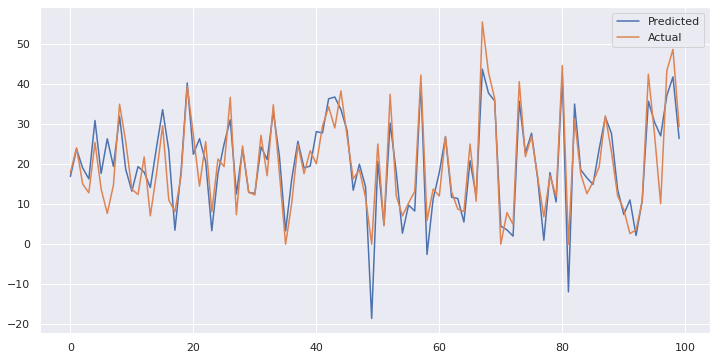

In [68]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_lr[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

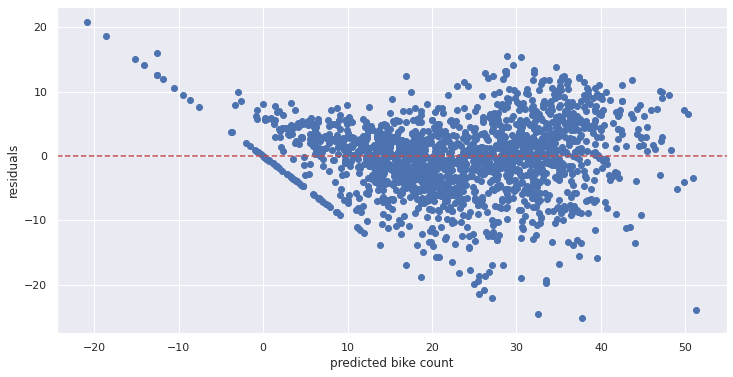

In [69]:
#Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_lr, y_test- test_pred_lr)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

In [70]:
residuals = y_train.values-train_pred_lr


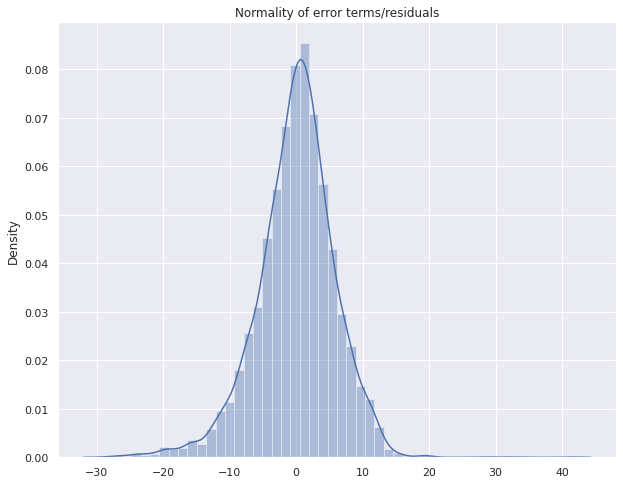

In [71]:
#Normality
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**Lasso Regression**

In [72]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [73]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)


The best fit alpha value is found out to be : {'alpha': 0.0001}


In [74]:
# predictions on train and test dataset
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso= lasso_regressor.predict(X_test)

In [75]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_lasso, 'Lasso', train=True)

MSE : 34.24926846747085
RMSE : 5.852287455984271
MAE : 4.406509503782545
 
R2 : 0.7780821907924574
Adjusted R2 :  0.7712901212934626


In [76]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_lasso, 'Lasso', train=False)

MSE : 33.48120283557305
RMSE : 5.786294395861055
MAE : 4.392172437320416
 
R2 : 0.7874023839562682
Adjusted R2 :  0.7808955705164364


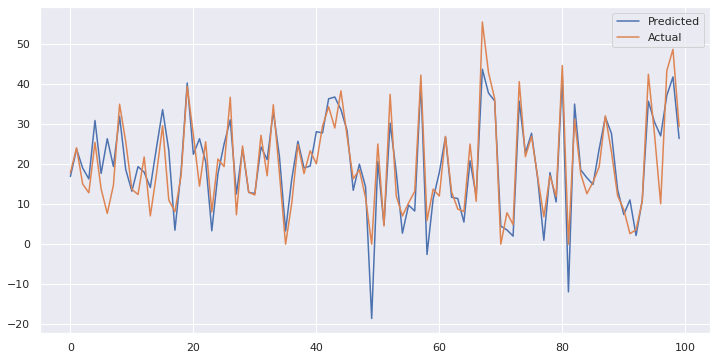

In [77]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_lasso[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

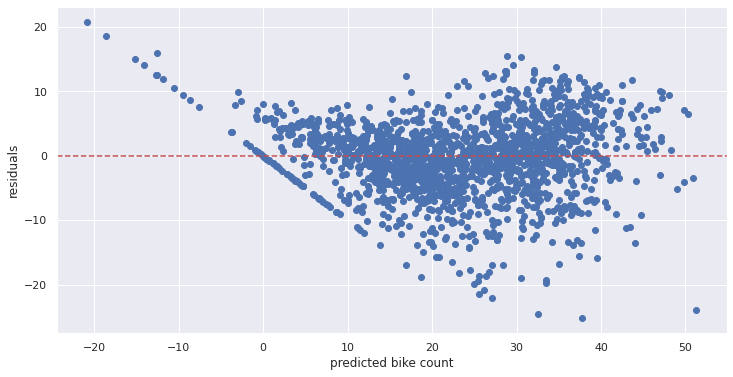

In [78]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_lasso, y_test- test_pred_lasso)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

**Ridge regression**

In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# cross validation
param_ridge = {'alpha': [1e-10,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,5,10,20,30,35,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, param_ridge, cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [80]:
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)


The best fit alpha value is found out to be : {'alpha': 1}


In [81]:
# predictions on train and test dataset
train_pred_ridge = ridge_reg.predict(X_train)
test_pred_ridge= ridge_reg.predict(X_test)

In [82]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_ridge, 'Ridge', train=True)

MSE : 34.250261561314524
RMSE : 5.852372302008351
MAE : 4.407284659914811
 
R2 : 0.7780757560503451
Adjusted R2 :  0.7712834896080956


In [83]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_ridge, 'Ridge', train=False)

MSE : 33.49659664299544
RMSE : 5.787624438661811
MAE : 4.39453827031332
 
R2 : 0.7873046369674306
Adjusted R2 :  0.7807948318599005


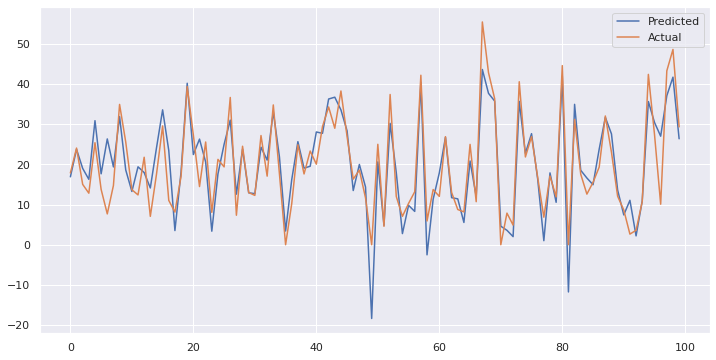

In [84]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_ridge[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

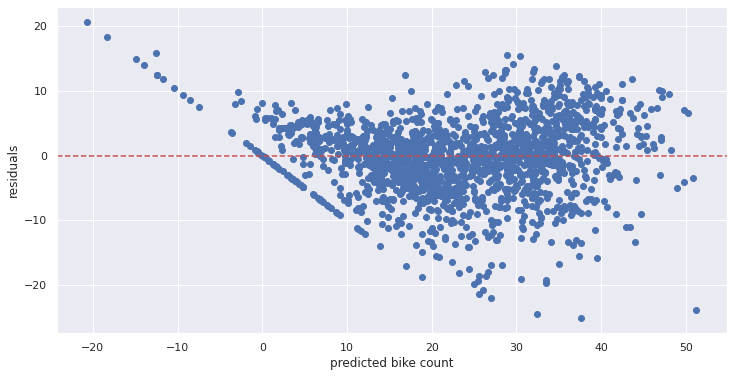

In [85]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_ridge, y_test- test_pred_ridge)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

**Random Forest Regressor**

In [86]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [87]:
# hyperparameter grid
param_dict_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
  }

In [88]:
# create regressor object
rf_model= RandomForestRegressor()

# fitting gridsearch
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict_rf,
                       cv = 2, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=5,

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [89]:
# best parameters
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [90]:
# optimal model
rf_optimal_model= rf_grid.best_estimator_

In [91]:
# Model score
rf_optimal_model.score(X_train,y_train)

0.7864583015935951

In [92]:
# Making predictions on train and test data
train_pred_rf= rf_optimal_model.predict(X_train)
test_pred_rf= rf_optimal_model.predict(X_test)

In [93]:
# Train data Evaluation metrics
evaluation_metrics(y_train, train_pred_rf, 'Random Forest', train=True)

MSE : 32.9565571318378
RMSE : 5.740780184943315
MAE : 4.237495910605996
 
R2 : 0.7864583015935951
Adjusted R2 :  0.7799225933433697


In [94]:
# Test data Evaluation metrics
evaluation_metrics(y_test, test_pred_rf, 'Random Forest', train=False)

MSE : 37.38702925832188
RMSE : 6.1144933770772765
MAE : 4.407666396941093
 
R2 : 0.762601321992187
Adjusted R2 :  0.7553354413233193


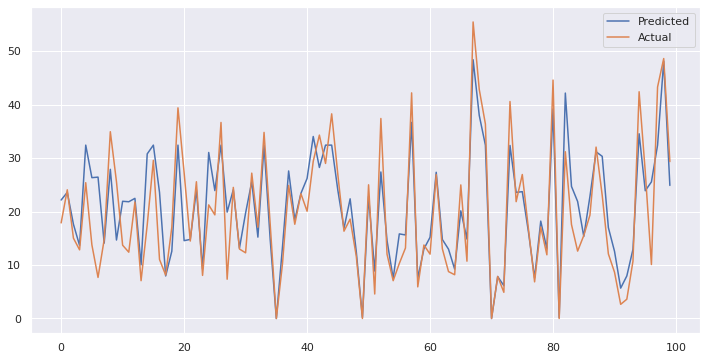

In [95]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_rf[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

Feature Importances

In [96]:
rf_optimal_model.feature_importances_

array([1.94200659e-01, 4.61440605e-04, 1.66612043e-03, 9.32444244e-02,
       2.24795772e-02, 5.44634177e-04, 6.13729859e-02, 0.00000000e+00,
       1.44161848e-03, 3.73830320e-03, 1.57068705e-02, 1.24173441e-02,
       1.44825977e-03, 0.00000000e+00, 8.21383380e-05, 0.00000000e+00,
       4.30981451e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.81009331e-03,
       3.35123674e-02, 1.55538523e-02, 1.51661193e-02, 3.12176782e-02,
       2.80733665e-02, 7.33137222e-03, 1.30629353e-03, 1.73407223e-04,
       2.37782745e-01, 1.51559910e-04, 2.05599815e-01, 0.00000000e+00,
       3.46120962e-04, 2.39366408e-05, 6.19356700e-05, 0.00000000e+00,
       0.00000000e+00, 7.48722035e-03, 0.00000000e+00, 0.00000000e+00,
       1.25653612e-04, 0.00000000e+00, 0.00000000e+00, 2.39881516e-05,
       3.97174611e-04, 0.00000000e+00, 7.82577785e-06, 0.00000000e+00])

Create function to plot feature importance

In [97]:
def plot_feature_importance(model,X):

  ''' plots feature importance graph '''


  importances = list(model.feature_importances_)

  feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

  importance_df= pd.DataFrame(feature_importances)
  importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

  plt.figure(figsize=(12,6))
  sns.barplot(x='feature_importance', y='feature', data=importance_df)
  
  plt.xlabel("Importance")
  plt.tight_layout()

  plt.show()

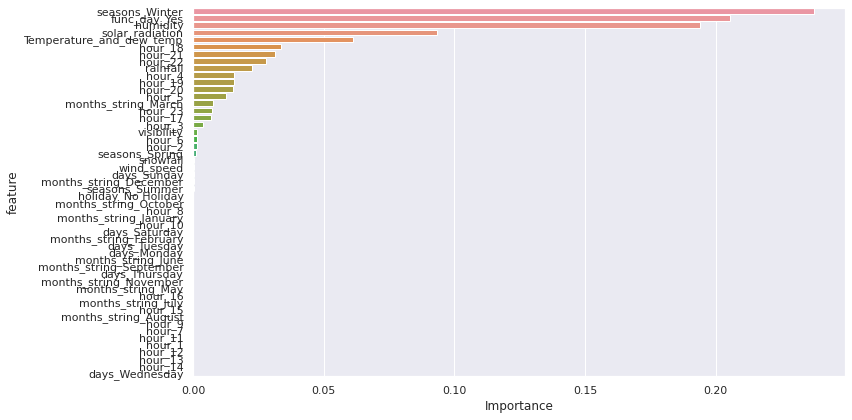

In [98]:
plot_feature_importance(rf_optimal_model,X)


**Test Results**

In [99]:
train_results_df= pd.DataFrame(train_result).T.reset_index()
train_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
train_results_df

,Model,MSE,RMSE,MAE,R2 score,Adjusted R2
0,Linear,34.249254,5.852286,4.406536,0.778082,0.771290
1,Lasso,34.249268,5.852287,4.406510,0.778082,0.771290
2,Ridge,34.250262,5.852372,4.407285,0.778076,0.771283
3,Random Forest,32.956557,5.740780,4.237496,0.786458,0.779923


In [100]:
test_results_df= pd.DataFrame(test_result).T.reset_index()
test_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
test_results_df

,Model,MSE,RMSE,MAE,R2 score,Adjusted R2
0,Linear,33.480918,5.786270,4.392178,0.787404,0.780897
1,Lasso,33.481203,5.786294,4.392172,0.787402,0.780896
2,Ridge,33.496597,5.787624,4.394538,0.787305,0.780795
3,Random Forest,37.387029,6.114493,4.407666,0.762601,0.755335


**Conclusion**

There are not any duplicate rows and missing values in the dataset

The rented bike count data is positively skewed and After square root transformation outliers have been removed.

Rented bike count is significantly less in Winter whereas high on summer

In all days, the bike count is more or less the same

People are renting bike more on non holidays than holidays and rented bike count is 0 on a non functioning day

People use bikes only on functioning day. Also it means from company's perspective, if anyone rents bike on a day then that is a functioning day.

There is a increase in demand of rental bikes as the temperature increases. The maximum demand is around 28-33 degree Celsius

The demand for rented bikes drops as humidity increases. The rented bike count is maximum when humidity is around 15%.

The bike count gradually decreases as the wind speed increases but its maximum at around 7m/s

Hour and temperature are highly correlated with bike count as compared to other features

Dew point temp and temperature are highly correlated with each other, I added them together.

Linear Regression Algorithm has got Lowest RMSE Score 5.78 and Highest Adjusted R2 score 0.78 among all the models
